100%|██████████| 1.60G/1.60G [00:16<00:00, 106MB/s]

Extracting files...


Total images loaded: 23000
X shape: (23000, 50, 50, 3)
y shape: (23000,)


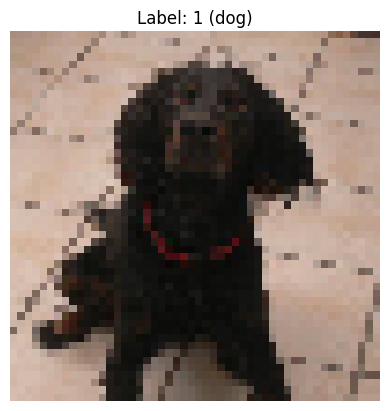

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import kagglehub # Import kagglehub to use the downloaded path

# Use the path from kagglehub download
path = kagglehub.dataset_download("arpitjain007/dog-vs-cat-fastai")
DIRECTORY = os.path.join(path, 'dogscats', 'train') # Construct the correct path

CATEGORIES = ['cats', 'dogs']  # folder names

img_size = 50
data = []

# --- Step 1: Load Images ---
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)  # 0 = cat, 1 = dog

    for img in os.listdir(folder):
        try:
            img_path = os.path.join(folder, img)
            img_arr = cv2.imread(img_path)              # read image
            img_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)  # convert BGR->RGB
            img_resized = cv2.resize(img_rgb, (img_size, img_size))  # resize
            data.append([img_resized, label])
        except Exception as e:
            pass  # skip corrupted images

print(f"Total images loaded: {len(data)}")

# --- Step 2: Shuffle dataset ---
random.shuffle(data)

# --- Step 3: Split into features (X) and labels (y) ---
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X) / 255.0  # normalize to 0-1
y = np.array(y)

print("X shape:", X.shape)  # should be (num_images, 50, 50, 3)
print("y shape:", y.shape)  # should be (num_images,)

# --- Step 4: Preview a random image ---
plt.imshow(X[0])
plt.title(f"Label: {y[0]} ({'cat' if y[0]==0 else 'dog'})")
plt.axis("off")
plt.show()

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arpitjain007/dog-vs-cat-fastai")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arpitjain007/dog-vs-cat-fastai/versions/1


# Train the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import kagglehub # Import kagglehub to use the downloaded path

# --- Step 1: Setup parameters ---
IMG_SIZE = 100
BATCH_SIZE = 32
EPOCHS = 15

# --- Step 2: Data loading & augmentation ---
# Use the path from kagglehub download
path = kagglehub.dataset_download("arpitjain007/dog-vs-cat-fastai")
DIRECTORY = os.path.join(path, 'dogscats', 'train') # Construct the correct path

train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

train_data = train_datagen.flow_from_directory(
    DIRECTORY,  # Use the correct path
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    DIRECTORY, # Use the correct path
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# --- Step 3: Define upgraded CNN ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# --- Step 4: Compile ---
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- Step 5: Train ---
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

# --- Step 6: Save model ---
model.save("cats_vs_dogs_upgraded.h5")

print("✅ Training complete & model saved successfully!")

Found 18400 images belonging to 2 classes.
Found 4600 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
575/575 ━━━━━━━━━━━━━━━━━━━━ 606s 1s/step - accuracy: 0.6076 - loss: 0.8157 - val_accuracy: 0.6680 - val_loss: 0.6101
Epoch 2/15
575/575 ━━━━━━━━━━━━━━━━━━━━ 616s 1s/step - accuracy: 0.6836 - loss: 0.5910 - val_accuracy: 0.7191 - val_loss: 0.5485
Epoch 3/15
575/575 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - accuracy: 0.7049 - loss: 0.5638 - val_accuracy: 0.7113 - val_loss: 0.5672
Epoch 4/15
575/575 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - accuracy: 0.7193 - loss: 0.5445 - val_accuracy: 0.6898 - val_loss: 0.5797
Epoch 5/15
575/575 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 0.7334 - loss: 0.5232 - val_accuracy: 0.7511 - val_loss: 0.5011
Epoch 6/15
575/575 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - accuracy: 0.7450 - loss: 0.5123 - val_accuracy: 0.7691 - val_loss: 0.4782
Epoch 7/15
575/575 ━━━━━━━━━━━━━━━━━━━━ 594s 1s/step - accuracy: 0.7609 - loss: 0.4926 - val_accuracy: 0.7685 - val_loss: 0.4780
Epoch 8/15
575/575 ━━━━━━━━━━━━━━━━━━━━ 603s 1s/step - accuracy: 0.7722 - loss: 0.4759 - val_accu

## Load and use the trained model

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import kagglehub # Import kagglehub to use the downloaded path
import os

# Load trained model
model = load_model("cats_vs_dogs_upgraded.h5") # Load the upgraded model

# Prediction function
def predict_image(img_name, img_size=100): # Use img_name instead of img_path and update img_size
    # Use the path from kagglehub download
    path = kagglehub.dataset_download("arpitjain007/dog-vs-cat-fastai")
    # Construct the correct path to the test image
    img_path = os.path.join(path, 'dogscats', 'train', 'cats', img_name) # Assuming the image is in the cats folder

    # Load image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (img_size, img_size))

    # Preprocess
    img_array = img_resized.astype("float32") / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 100, 100, 3)

    # Predict
    prediction = model.predict(img_array)[0][0]
    label = "Dog" if prediction > 0.5 else "Cat"

    # Show image + prediction
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {label} ({prediction:.2f})")
    plt.axis("off")
    plt.show()

    return label, prediction

predict_image("cat.1.jpg") # Use an example image name from the dataset

**FULL CODE**

In [ ]:
# --- Imports ---
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import kagglehub # Import kagglehub to use the downloaded path


# --- Step 1: Load Dataset ---
# Use the path from kagglehub download
path = kagglehub.dataset_download("arpitjain007/dog-vs-cat-fastai")
DIRECTORY = os.path.join(path, 'dogscats', 'train') # Construct the correct path

CATEGORIES = ['cats', 'dogs']  # must match folder names
IMG_SIZE = 50

data = []
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)  # 0 = cat, 1 = dog
    for img in os.listdir(folder):
        try:
            img_path = os.path.join(folder, img)
            img_arr = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
            data.append([img_resized, label])
        except Exception as e:
            pass

print(f"Total images loaded: {len(data)}")

# Shuffle dataset
random.shuffle(data)

# Split features & labels
X, y = [], []
for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X) / 255.0  # normalize
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

# --- Step 2: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# --- Step 3: Define CNN Model ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- Step 4: Train Model ---
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# --- Step 5: Evaluate ---
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

# --- Step 6: Save Model ---
model.save("cats_vs_dogs_cnn.h5")
print("Model saved as cats_vs_dogs_cnn.h5")

# --- Step 7: Plot Training History ---
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# --- Step 8: Prediction Function ---
def predict_image(img_path, img_size=50):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (img_size, img_size))

    img_array = img_resized.astype("float32") / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Dog" if prediction > 0.5 else "Cat"

    plt.imshow(img_rgb)
    plt.title(f"Prediction: {label} ({prediction:.2f})")
    plt.axis("off")
    plt.show()

    return label, prediction

# Example:
# predict_image("/mnt/data/download.png")

In [ ]:
predict_image("cat1.jpg")